In [1]:
import numpy as np

import wf_psf as wf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns



In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

saving_folder ='../figures/'

define_plot_style()
sns.set(font_scale=1.5)



In [20]:
metrics_file = '../wf-outputs/metrics/wfe_study_bis/metrics-poly_wfe_study_%s_bis_%s.npy'


# wf.script_utils.extract_shape_pix_results ->
#     model_polyc_shpix_rmse = res[0]
#     model_polyc_shpix_std_rmse = res[1]
#     model_polyc_shpix_rel_rmse = res[2]
#     model_polyc_shpix_std_rel_rmse = res[3]


In [25]:
# Extract full datasets
n_realisations = 5

dataset_list = [
    ('064',),
    ('128',),
    ('256',),
    ('256_benchmark',),
]

metrics_dict_list = []
pix_metrics_dict_list = []
opd_metrics_dict_list = []
for idx in range(1, n_realisations+1):   
    metrics_dict_list_ = wf.script_utils.extract_shape_pix_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    pix_metrics_dict_list_ = wf.script_utils.extract_poly_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    opd_metrics_dict_list_ = wf.script_utils.extract_opd_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    metrics_dict_list.append(metrics_dict_list_)
    pix_metrics_dict_list.append(pix_metrics_dict_list_)
    opd_metrics_dict_list.append(opd_metrics_dict_list_)
    
metrics_dict_list_np = np.array(metrics_dict_list)
pix_metrics_dict_list_np = np.array(pix_metrics_dict_list)
opd_metrics_dict_list_np = np.array(opd_metrics_dict_list)



In [26]:

metrics_mean = np.mean(metrics_dict_list_np,axis=0)
pix_metrics_mean = np.mean(pix_metrics_dict_list_np,axis=0)
opd_metrics_mean = np.mean(opd_metrics_dict_list_np,axis=0)

metrics_median = np.median(metrics_dict_list_np,axis=0)
pix_metrics_median = np.median(pix_metrics_dict_list_np,axis=0)
opd_metrics_median = np.median(opd_metrics_dict_list_np,axis=0)

metrics_std = np.std(metrics_dict_list_np,axis=0)
pix_metrics_std = np.std(pix_metrics_dict_list_np,axis=0)
opd_metrics_std = np.std(opd_metrics_dict_list_np,axis=0)

metrics_best = np.min(metrics_dict_list_np,axis=0)
pix_metrics_best = np.min(pix_metrics_dict_list_np,axis=0)
opd_metrics_best = np.min(opd_metrics_dict_list_np,axis=0)



In [48]:

# Log files path
log_files_path = '../wf-outputs/log-files/wfe_study_bis/poly_wfe_study_%s_bis_%s_output.log'



In [50]:

times_list = []
# Load computing times
for idx in range(1, n_realisations+1):
    
    times_list.append([
        float(open(log_files_path % (dataset+(str(idx),)) ).readlines()[-3][20:-1])
        for dataset in dataset_list
    ])

times_list_np = np.array(times_list)


In [51]:
times_list_np.shape

(5, 4)

In [59]:
# Convert from sec to hours
times_mean = np.mean(times_list_np, axis=0) / 3600.
times_median = np.median(times_list_np, axis=0) / 3600.
times_std = np.std(times_list_np, axis=0) / 3600.
times_best = np.min(times_list_np, axis=0) / 3600.


In [27]:
print(metrics_mean.shape)
print(metrics_median.shape)
print(metrics_std.shape)
print(metrics_best.shape)

print(pix_metrics_mean.shape)
print(pix_metrics_median.shape)
print(pix_metrics_std.shape)
print(pix_metrics_best.shape)

print(opd_metrics_mean.shape)
print(opd_metrics_median.shape)
print(opd_metrics_std.shape)
print(opd_metrics_best.shape)

# Dimensions (a,b)
# a -> (rmse, std_rmse , rel_rmse , std_rel_rmse)
# b -> datasets


(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


In [111]:
print('Relative pixel RMSE')
print('Mean: \t', pix_metrics_mean[2,:])
print('Median: ', pix_metrics_median[2,:])
print('Std dev:', pix_metrics_std[2,:])
print('Best: \t', pix_metrics_best[2,:])
print(''),print('')
print('Relative SR pixel RMSE')
print('Mean: \t', metrics_mean[2,:])
print('Median: ', metrics_median[2,:])
print('Std dev:', metrics_std[2,:])
print('Best: \t', metrics_best[2,:])
print(''),print('')
print('Relative WFE RMSE')
print('Mean: \t', opd_metrics_mean[2,:])
print('Median: ', opd_metrics_median[2,:])
print('Std dev:', opd_metrics_std[2,:])
print('Best: \t', opd_metrics_best[2,:])
print(''),print('')
print('Computing times [hours]')
print('Mean: \t', times_mean)
print('Median: ', times_median)
print('Std dev:', times_std)
print('Best: \t', times_best)

print(''),print('')
print('Datasets: ', dataset_list)


Relative pixel RMSE
Mean: 	 [3.1750945  1.84342574 1.25121413 1.18423985]
Median:  [3.23595814 1.82701927 1.24881091 1.19463746]
Std dev: [0.09718325 0.11428544 0.11839753 0.15819872]
Best: 	 [3.02211996 1.67238005 1.10027287 0.95156701]


Relative SR pixel RMSE
Mean: 	 [5.11659548 3.57499797 3.20003305 2.9366166 ]
Median:  [5.10238223 3.47441174 2.90431827 2.66767479]
Std dev: [0.81276047 0.68000629 0.81354262 1.01530664]
Best: 	 [4.16589268 2.59153415 2.36748401 1.4681709 ]


Relative WFE RMSE
Mean: 	 [174.27150299 182.23829013 182.77321189 166.88141344]
Median:  [177.77867077 195.22790607 183.44924369 157.03706386]
Std dev: [ 7.26802837 21.86601666 21.73302759 32.50104431]
Best: 	 [161.66156863 141.95092323 153.94904992 125.72950157]


Computing times [hours]
Mean: 	 [5.35773341 6.83683414 9.42521784 8.80680034]
Median:  [5.27575952 6.86165331 8.98945838 8.77821926]
Std dev: [0.16113658 0.1189318  0.87125987 0.26601767]
Best: 	 [5.233563   6.6733736  8.56322657 8.50814952]


Dataset

In [63]:
times_mean.shape


(4,)

# Plots

In [44]:
wfe_res = np.array([64, 128, 256])


# Relative SR (res x3) pixel RMSE & Computing time vs WFE res

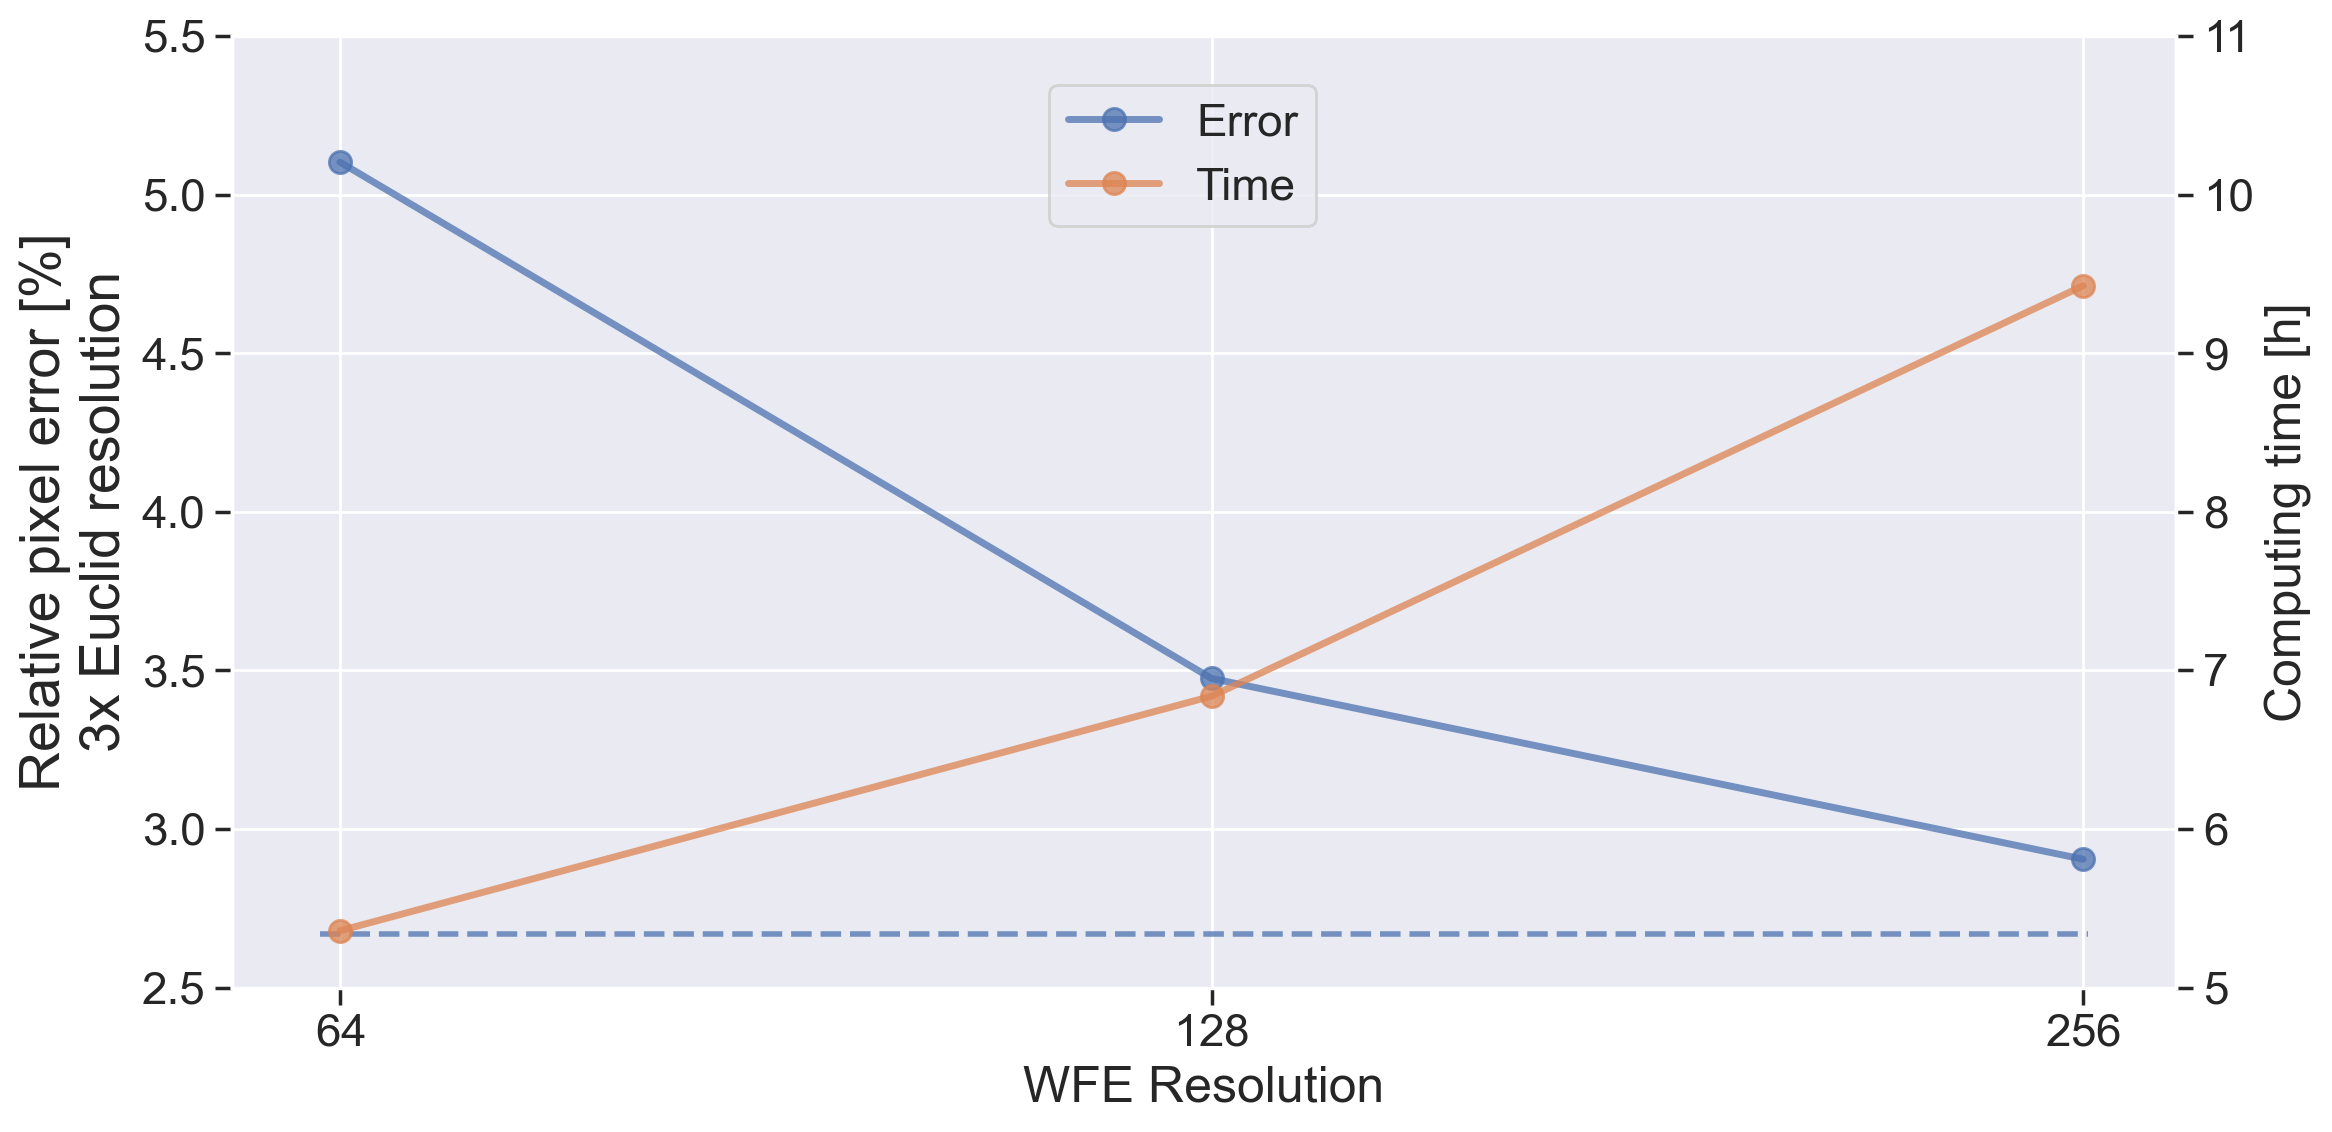

In [125]:

# Define style
define_plot_style()
sns.set(font_scale=1.5)

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='white')

# fig.suptitle('PSF relative errors @ 3x Euclid resolution - Training time')
    

ax1.set_xlabel('WFE Resolution')
ax1.set_ylabel('Relative pixel error [%]\n3x Euclid resolution', fontsize = 20) 

# ax1.plot(wfe_res, metrics_mean[2,:-1], color=sns.color_palette()[0], label='Error', **kwargs)
# ax1.hlines(metrics_mean[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)

ax1.plot(wfe_res, metrics_median[2,:-1], color=sns.color_palette()[0], label='Error', **kwargs)
ax1.hlines(metrics_median[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)

ax1.tick_params(axis='y')
ax1.set_ylim((2.5,5.5))
ax1.yaxis.set_major_locator(mpl.ticker.LinearLocator(7))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

ax1.set_xscale('log', base=2) # Important to leave the base=2
plt.xticks([64,128,256])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())


ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.xaxis.major.formatter._useMathText = True


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Computing time [h]')  # we already handled the x-label with ax1
ax2.plot(wfe_res, times_mean[:-1], color=sns.color_palette()[1], label='Time', **kwargs)
ax2.tick_params(axis='y') 
ax2.grid(None)
ax2.set_ylim((5,11))
ax2.yaxis.set_major_locator(mpl.ticker.LinearLocator(7))


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc=(0.45,0.8))

# plt.savefig('../figures/wfe-study_resx3_error-and-time_vs_wfe-res_mean.pdf')
# plt.savefig('../figures/wfe-study_resx3_error-and-time_vs_wfe-res_median.pdf')

plt.show()




# Relative (res x1) pixel RMSE & Computing time vs WFE res

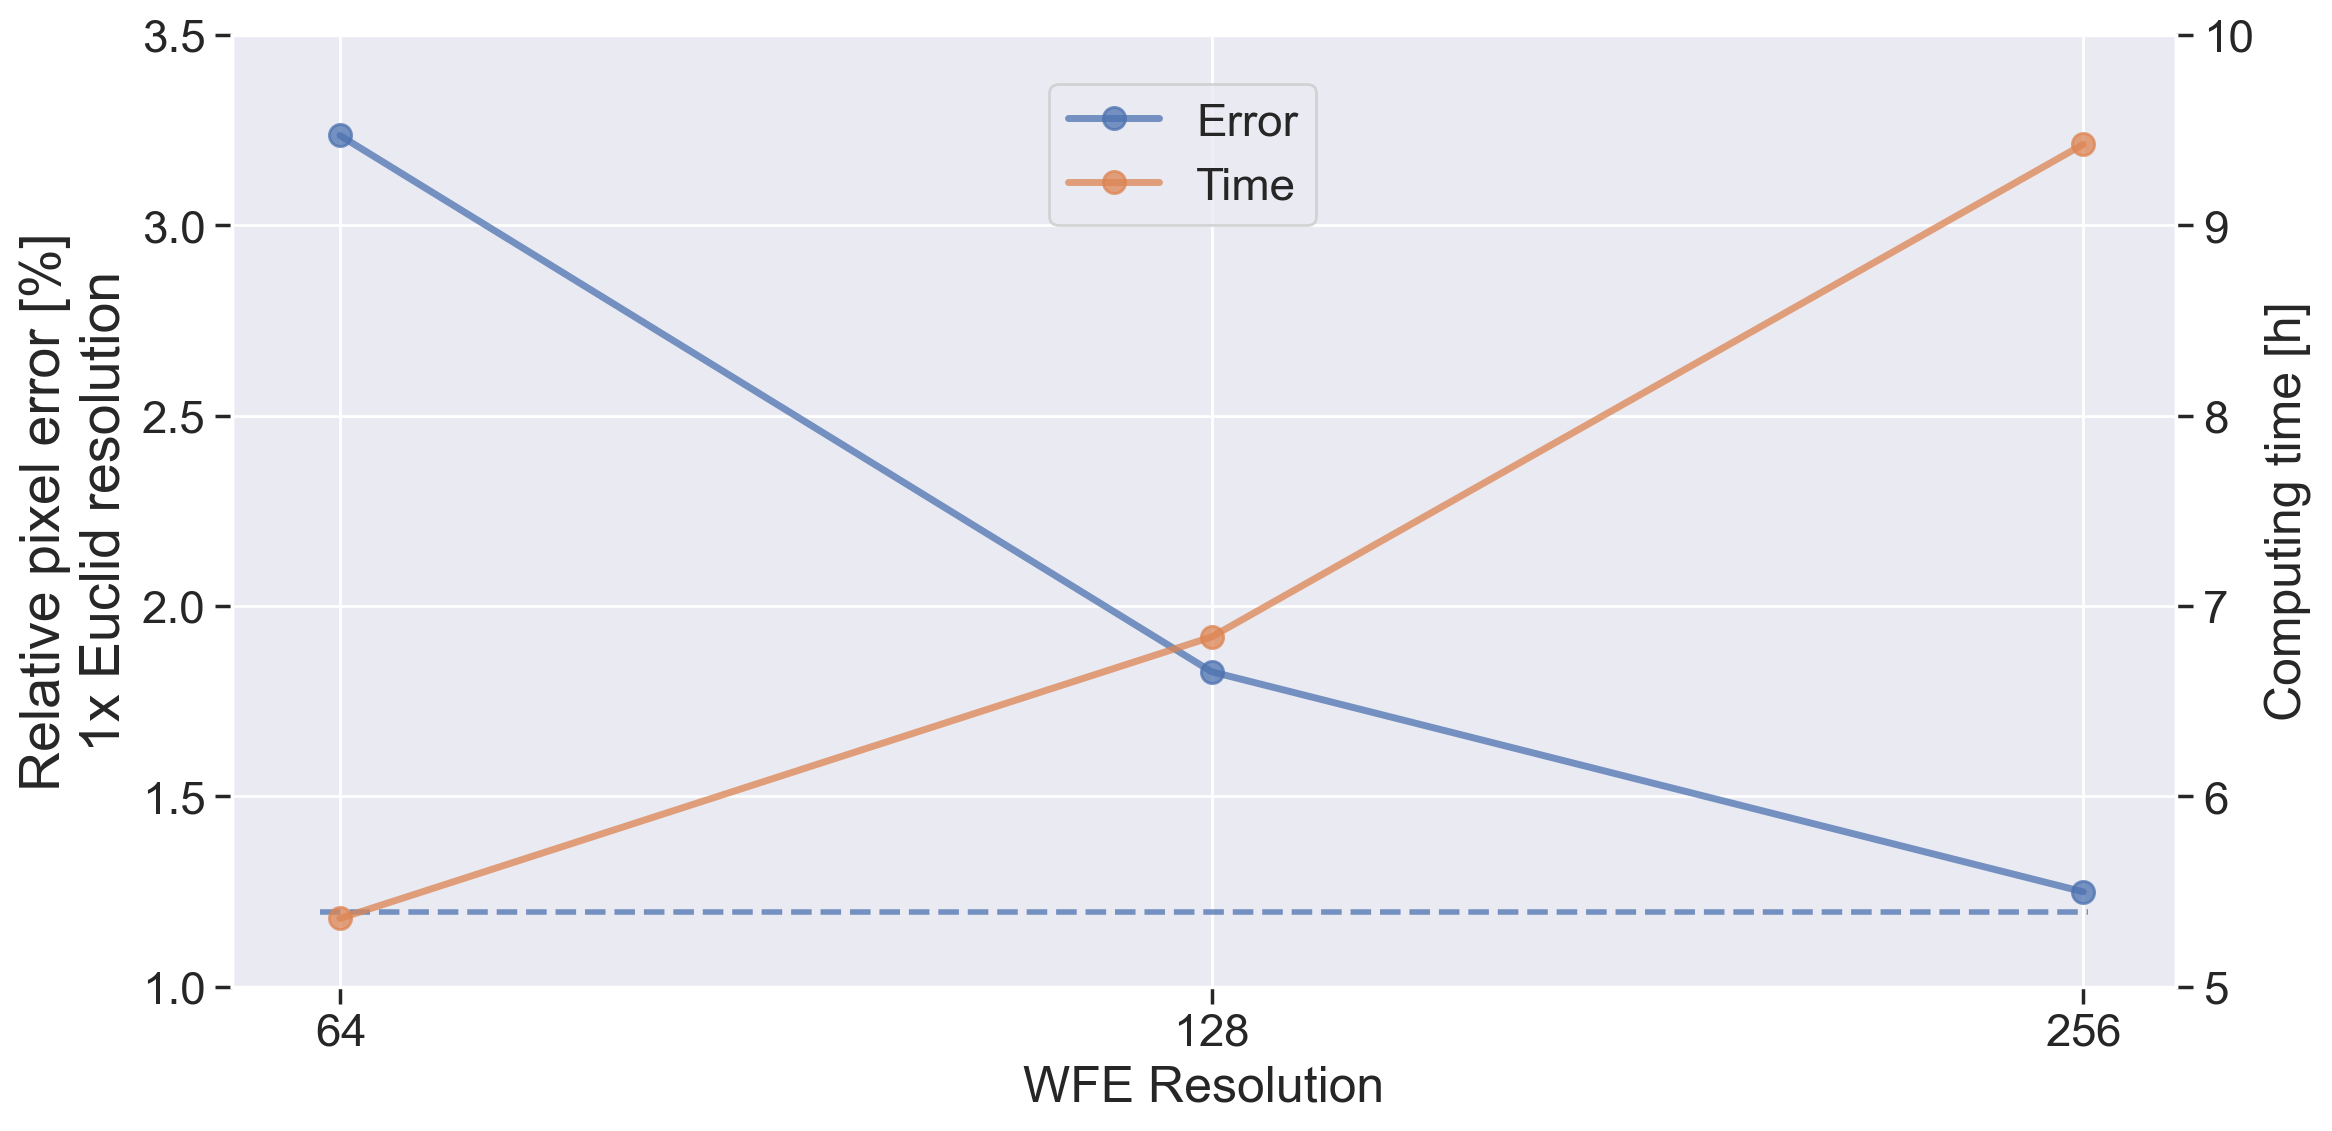

In [126]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='white')

# fig.suptitle('PSF relative errors @ 3x Euclid resolution - Training time')
    

ax1.set_xlabel('WFE Resolution')
ax1.set_ylabel('Relative pixel error [%]\n1x Euclid resolution', fontsize = 20) 

# ax1.plot(wfe_res, pix_metrics_mean[2,:-1], color=sns.color_palette()[0], label='Error', **kwargs)
# ax1.hlines(pix_metrics_mean[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)

ax1.plot(wfe_res, pix_metrics_median[2,:-1], color=sns.color_palette()[0], label='Error', **kwargs)
ax1.hlines(pix_metrics_median[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)

ax1.tick_params(axis='y')
ax1.set_ylim((1,3.5))
ax1.yaxis.set_major_locator(mpl.ticker.LinearLocator(6))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

ax1.set_xscale('log', base=2) # Important to leave the base=2
plt.xticks([64,128,256])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())


ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.xaxis.major.formatter._useMathText = True


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Computing time [h]')  # we already handled the x-label with ax1
ax2.plot(wfe_res, times_mean[:-1], color=sns.color_palette()[1], label='Time', **kwargs)
ax2.tick_params(axis='y') 
ax2.grid(None)
ax2.set_ylim((5,10))
ax2.yaxis.set_major_locator(mpl.ticker.LinearLocator(6))


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc=(0.45,0.8))

# plt.savefig('../figures/wfe-study_resx1_error-and-time_vs_wfe-res_mean.pdf')
# plt.savefig('../figures/wfe-study_resx1_error-and-time_vs_wfe-res_median.pdf')

plt.show()


# Compute error between datasets of different WFE res

In [142]:

# test_256_path = ' ../../WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_256.npy'
# test_4096_path = ' ../../WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_4096.npy'

test_256_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/github/wf-SEDs/WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_256.npy'
test_4096_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/github/wf-SEDs/WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_4096.npy'

test_256 = np.load(test_256_path, allow_pickle=True)[()]
test_4096 = np.load(test_4096_path, allow_pickle=True)[()]


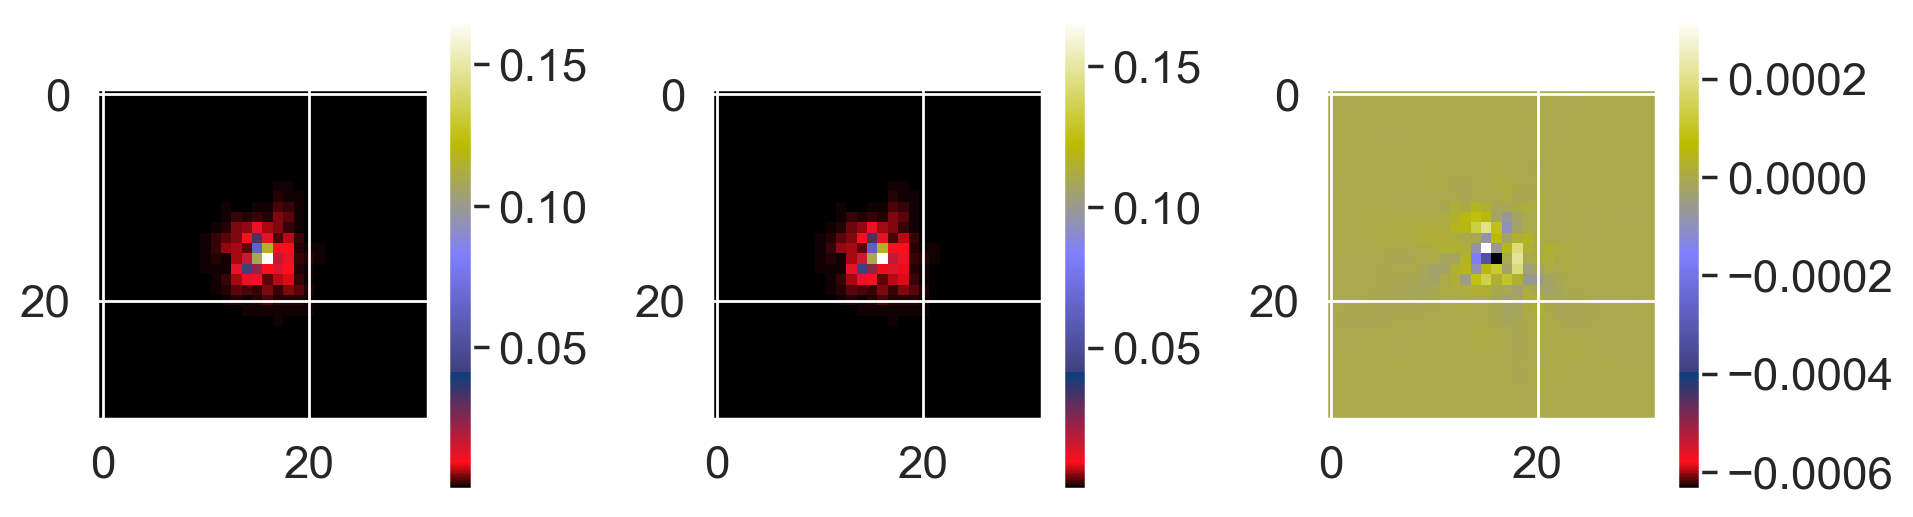

In [157]:
it = 2

plt.figure(figsize=(10,3))

plt.subplot(131)
plt.imshow(test_256['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()

plt.subplot(132)
plt.imshow(test_4096['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()

plt.subplot(133)
plt.imshow(test_256['stars'][it,:,:] - test_4096['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()
plt.show()


## Pixel error x1 res

In [158]:
GT_preds = test_4096['stars']
preds = test_256['stars']


# Calculate residuals
residuals = np.sqrt(np.mean((GT_preds - preds)**2, axis=(1, 2)))
GT_star_mean = np.sqrt(np.mean((GT_preds)**2, axis=(1, 2)))

# RMSE calculations
rmse = np.mean(residuals)
rel_rmse = 100. * np.mean(residuals / GT_star_mean)

# STD calculations
std_rmse = np.std(residuals)
std_rel_rmse = 100. * np.std(residuals / GT_star_mean)

# Print RMSE values
print('Absolute RMSE:\t %.4e \t +/- %.4e' % (rmse, std_rmse))
print('Relative RMSE:\t %.4e %% \t +/- %.4e %%' % (rel_rmse, std_rel_rmse))

# rmse, rel_rmse, std_rmse, std_rel_rmse



Absolute RMSE:	 4.3657e-05 	 +/- 1.2729e-05
Relative RMSE:	 6.0011e-01 % 	 +/- 1.5855e-01 %


# Regenerate x3 res test stars